In [11]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [12]:
from sklearn.gaussian_process.kernels import RBF

from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [13]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 500
ESTIMATION_WINDOW = 365 * 3

ESTIMATOR = CovEstimators.GPR.value(
    kernel=RBF(), shrinkage_type="linear", window_size=365 * 3
)

In [14]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [15]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [02:12<00:00,  2.13it/s]


StrategyStatistics:
* final_nav = 4.834234
* geom_avg_total_r = 0.086408
* geom_avg_xs_r = 0.058123
* std_xs_r = 0.147012
* min_xs_r = -0.073258
* max_xs_r = 0.069910
* skew = -0.384649
* kurtosis = 7.276883
* max_dd = -0.395424
* sharpe = 0.395365
* alpha_buy_hold = 0.008836
* tracking_error_buy_hold = 0.204933
* ir_buy_hold = 0.043119
* factor_loadings = {'low_risk': 0.46866290556111356, 'momentum': -0.019526156304347533, 'quality': 0.019576842814500478, 'size': 0.1342660889440472, 'value': -0.20070950950687977, 'spx': 0.4680696304070494}
* alpha_benchmark = 0.021089
* alpha_benchmark_pvalue = 0.344796
* tracking_error_benchmark = 0.127839
* ir_benchmark = 0.164964
* ttest_pval = 0.528011
* levene_pval = 0.000000
* timing_ability_coef = -0.073744
* timing_ability_pval = 0.000598

In [16]:
result.std_xs_r, result.sharpe

(0.1470121153368772, 0.3953653022219887)

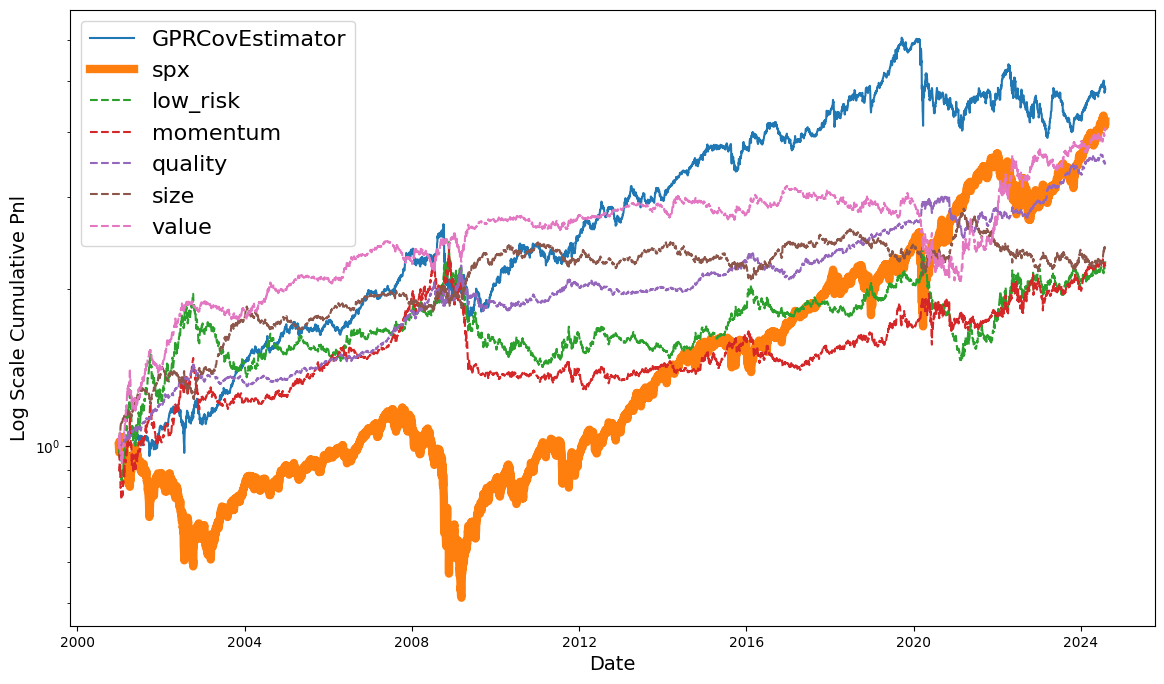

In [17]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

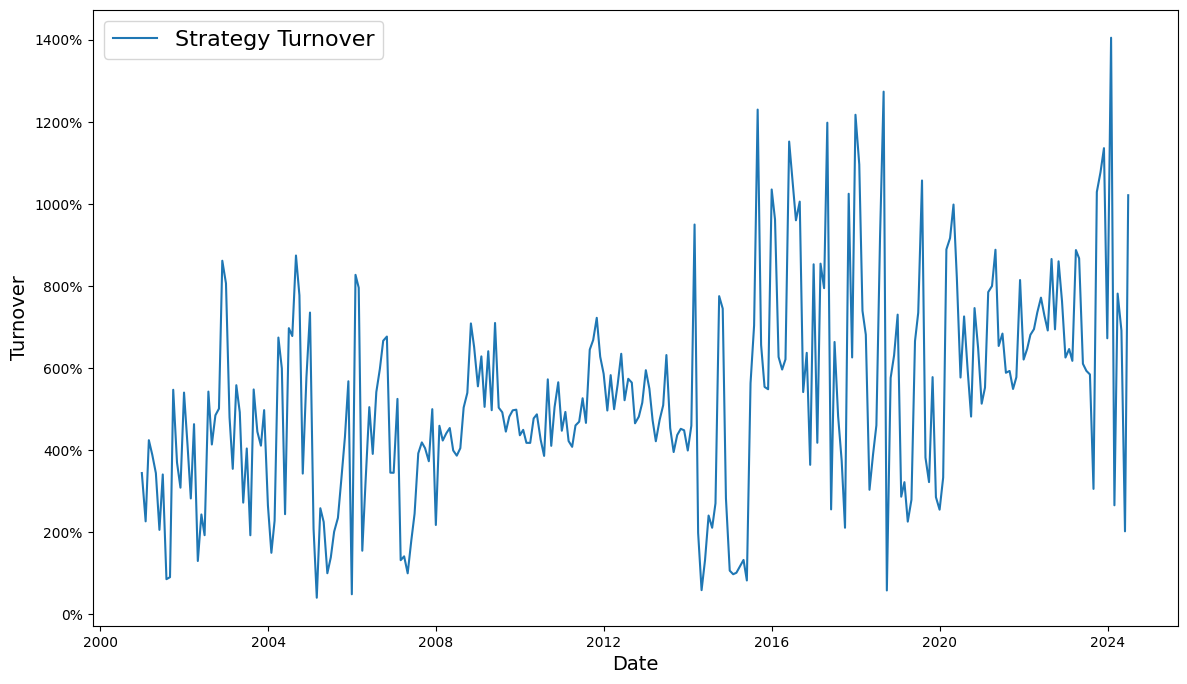

In [18]:
runner.plot_turnover()

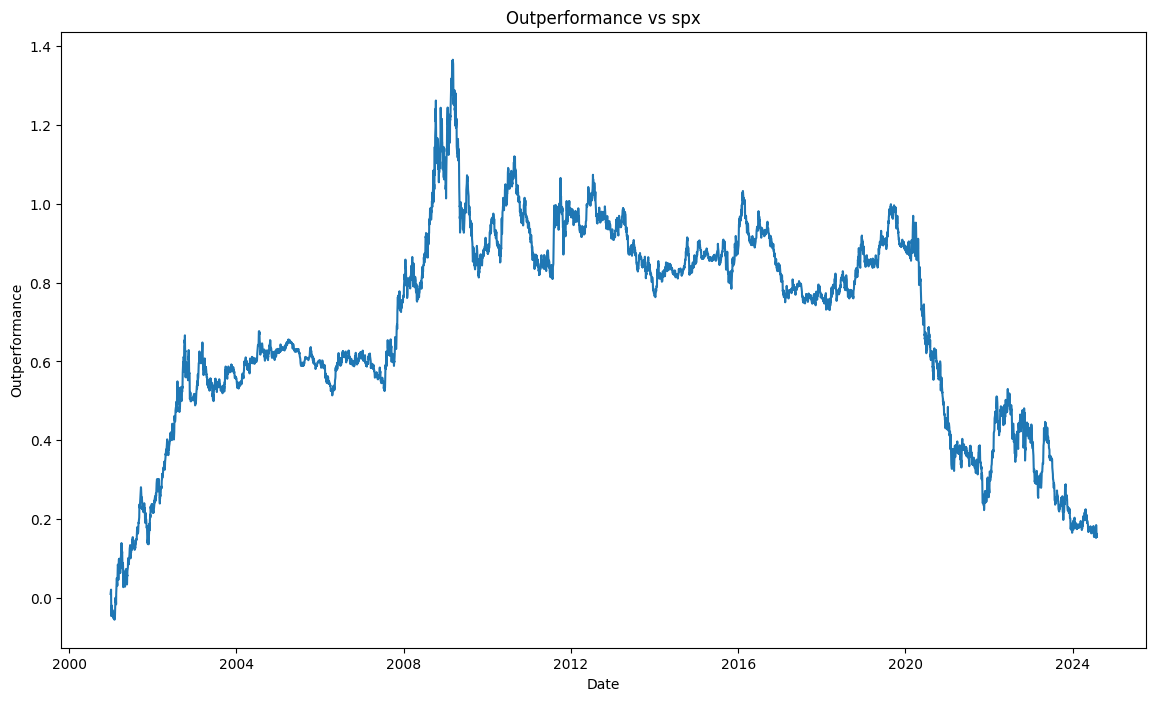

In [19]:
runner.plot_outperformance(mkt_only=True)

In [20]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")